In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

In [58]:
# KNN, Decision Tree, Random Forest and Voting Classifier
def VotingModel(train_knight: pd.DataFrame, test_knight: pd.DataFrame, output_file="Voting.txt"):
    # Definir las características (X) y la etiqueta (y) del conjunto de entrenamiento
    features = ['Hability', 'Agility', 'Reactivity', 'Push', 'Survival', 'Blocking', 'Deflection', 'Mass', 'Sprint', 'Attunement']
    X = train_knight[features].values  # Convertir a NumPy array
    y = train_knight['knight'].values  # Convertir a NumPy array

    # Escalar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir los datos en conjunto de entrenamiento y validación
    X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Definir los tres modelos
    knn = KNeighborsClassifier(n_neighbors=9)
    decision_tree = DecisionTreeClassifier(random_state=42)
    random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

    # Crear el Voting Classifier
    voting_clf = VotingClassifier(estimators=[
        ('knn', knn), 
        ('tree', decision_tree), 
        ('rf', random_forest)
    ], voting='hard')  # 'hard' voting para predicción basada en la mayoría de votos

    # Entrenar el Voting Classifier
    voting_clf.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de validación y calcular el F1-Score
    y_pred_val = voting_clf.predict(X_val)
    f1 = f1_score(y_val, y_pred_val, average='macro')
    print(f"F1_score (Validation): {f1:.2f}")

    if f1 >= 0.94:
        print("Modelo alcanzó al menos 94% en el F1-score")

    # Predecir con el conjunto de prueba (Test_knight)
    X_test = test_knight[features].values  # Convertir a NumPy array
    X_test_scaled = scaler.transform(X_test)
    y_pred_test = voting_clf.predict(X_test_scaled)

    # Guardar las predicciones en un archivo
    with open(output_file, "w") as output:
        for prediction in y_pred_test:
            output.write(prediction + "\n")

In [59]:
def plot_accuracy_vs_k(train_knight: pd.DataFrame) -> None:
    # Definir las características (X) y la etiqueta (y) del conjunto de entrenamiento
    features = ['Hability', 'Agility', 'Reactivity', 'Push', 'Survival', 'Blocking', 'Deflection', 'Mass', 'Sprint', 'Attunement']
    X = train_knight[features].values  # Convertir a NumPy array
    y = train_knight['knight'].values  # Convertir a NumPy array

    # Escalar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir los datos en conjunto de entrenamiento y validación
    X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Probar varios valores de k y calcular la precisión
    accuracy = []
    k_range = range(1, 30)
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_val = knn.predict(X_val)
        accuracy.append(accuracy_score(y_val, y_pred_val))

    # Graficar el rendimiento de KNN con diferentes valores de k
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, accuracy)
    plt.xlabel('k values')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs k in KNN')
    plt.show()

In [63]:
def main(train_file, test_file, output_file):
    dataTest = pd.read_csv("subject/Test_knight.csv")
    dataTrain = pd.read_csv("subject/Train_knight.csv")
    
    # Ejecutar el Voting Classifier y generar las predicciones
    VotingModel(dataTrain, dataTest, output_file)
    
    # Graficar la precisión para diferentes valores de k (opcional)
    plot_accuracy_vs_k(dataTrain)

F1_score (Validation): 0.97
Modelo alcanzó al menos 94% en el F1-score


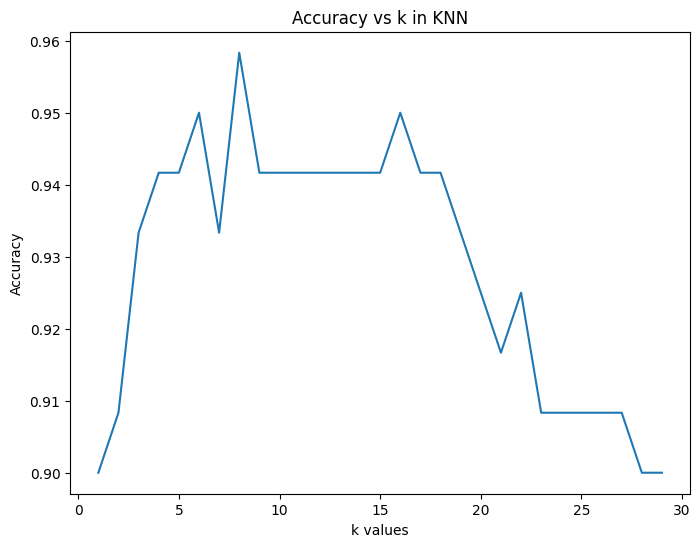

In [62]:
main("./subject/Train_knight.csv", "./subject/Test_knight.csv", "prediction.txt")

# Modelos Utilizados:

    KNeighborsClassifier: Del ejercicio ex05.
    DecisionTreeClassifier: Se agrega como segundo modelo para capturar relaciones no lineales.
    RandomForestClassifier: Un modelo robusto que combina múltiples árboles de decisión para hacer predicciones más precisas.

# Voting Classifier:

    Combina los tres modelos (KNN, Decision Tree y Random Forest).
    Utilizamos 'hard' voting, que selecciona la predicción basada en la mayoría de votos entre los tres modelos.

# F1-score:

    Se evalúa el modelo usando el F1-score en el conjunto de validación, y se imprime el valor. La meta es alcanzar un F1-score de al menos 94%.

# Predicción:

    Las predicciones finales se hacen con el conjunto de prueba Test_knight, y los resultados se escriben en el archivo Voting.txt.

# Gráfico (opcional):

    Se incluye una función para graficar la precisión del modelo KNN con diferentes valores de k.